<a href="https://colab.research.google.com/github/jhansanchez/Caso-de-estudio-Marketing/blob/main/Caso_Seguros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data ingestion**

In [ ]:
#Librerías
import pandas as pd
import numpy as np
import string 
import plotly.express as px # gráficos
import plotly.graph_objs as go # gráficos
import seaborn as sns # gráficos
from sklearn.impute import SimpleImputer # para imputación
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor ##Ensamble con bagging
from sklearn.ensemble import GradientBoostingRegressor ###Ensamble boosting
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt ### gráficos
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer ### para imputación
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor ##Ensamble con bagging
from sklearn.ensemble import GradientBoostingRegressor ###Ensamble boosting
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt ### gráficos

In [ ]:
#Conexión con colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargar datos
siniestros = pd.read_csv('/content/drive/Shareddrives/Analítica/NIVEL 3/Finanzas/DB_Siniestros.txt', encoding="ISO-8859-1", sep=None, engine='python')
sociodemograficas = pd.read_csv('/content/drive/Shareddrives/Analítica/NIVEL 3/Finanzas/BD_Sociodemograficas.txt', encoding="ISO-8859-1", sep=None, engine='python')
#expuestos1 = pd.read_csv('/content/drive/Shareddrives/Analítica/NIVEL 3/Finanzas/BD_Expuestos.txt', encoding="ISO-8859-1", sep=None, engine='python')

In [ ]:
expuestos = pd.read_csv("/content/drive/Shareddrives/Analítica/NIVEL 3/Finanzas/BD_expuestos1.xlsx - Hoja1.csv")

In [ ]:
expuestos1 = pd.read_csv('/content/drive/Shareddrives/Analítica/NIVEL 3/Finanzas/BD_Expuestos.txt', encoding="ISO-8859-1", sep=None, engine='python')

In [ ]:
expuestos1

Asegurado_Id  Poliza_Asegurado_Id FECHA_INICIO FECHA_CANCELACION  \
0           16286173            125696117   2018/01/01        2018/04/10   
1           11885152            141320760   2018/01/01               NaN   
2             763957            162532851   2018/01/01               NaN   
3           29082204            154620473   2018/01/01        2018/04/19   
4            4567640             93633862   2018/01/01               NaN   
...              ...                  ...          ...               ...   
300895      28476983             53646742   2018/01/01               NaN   
300896       8479396             89963102   2018/01/01        2018/03/08   
300897       6598270            165960557   2018/02/28               NaN   
300898       1000907            105811540   2018/01/01               NaN   
300899      34905586            161843515   2018/01/01               NaN   

         FECHA_FIN  
0       2018/04/10  
1       2019/12/31  
2       2019/12/31  
3       2018/04/19  
4       2019/12/31  
...            ...  
300895  2019/12/31  
300896  2018/03/08  
300897  2019/12/31  
300898  2019/12/31  
300899  2019/12/31  

[300900 rows x 5 columns]

# **Limpieza de datos**

## Base de datos siniestros

In [ ]:
def percent_null(datos):
    shape = datos.shape
    lista = datos.columns
    for i in lista:
        nulos = datos[i].isnull().sum()
        print(i, "->", nulos, " | ",round((nulos/shape[0])*100,2), "%")

In [ ]:
percent_null(siniestros)

In [ ]:
lista = siniestros.columns
for i in lista:
    print(i)
    print(siniestros[i].value_counts())
    print('__________________________')

In [ ]:
siniestros.dtypes

Clasificación internacional de enfermedades:
https://es.wikipedia.org/wiki/CIE-10
https://www.sssalud.gob.ar/hospitales/archivos/cie_10_revi.pdf

In [ ]:
siniestros[siniestros.Diagnostico_Codigo.str.match(pat = 'A')]['Diagnostico_Desc'].unique()

In [ ]:
siniestros[siniestros.Diagnostico_Codigo.str.isnumeric()]['Diagnostico_Desc'].unique()

In [ ]:
string.ascii_uppercase 

In [ ]:
lista = []
lista_abc =list(string.ascii_uppercase )

for letter in lista_abc:
    cantidad = siniestros.Diagnostico_Codigo.str.match(pat =letter).sum()
    lista.append(cantidad)

In [ ]:
lista_abc.append('numeric')
lista.append(siniestros.Diagnostico_Codigo.str.isnumeric().sum())

In [ ]:
diccionario = {
    'letra': lista_abc,
    'cantidad': lista
}

In [ ]:
cie = pd.DataFrame(diccionario).sort_values(by= 'cantidad', ascending = False)

In [ ]:
cie[cie['letra'] == 'numeric']

In [ ]:
numeric = siniestros[siniestros['Diagnostico_Codigo'] == '9']

In [ ]:
numeric['Reclamacion'].value_counts()

In [ ]:
numeric['Diagnostico_Desc'].value_counts()

In [ ]:
siniestros[siniestros['Asegurado_Id'] == 5147267]

In [ ]:
siniestros['Fecha_pago'] = pd.to_datetime(siniestros['Mes_Pago'], errors = 'coerce', format = '%Y%m')

In [ ]:
siniestros['Mes_Pago'] = pd.to_datetime(siniestros['Mes_Pago'], errors = 'coerce', format = '%Y%m')

In [ ]:
siniestros['Año_Pago'] = siniestros['Mes_Pago'].dt.year
siniestros['Mes_Pago'] = siniestros['Mes_Pago'].dt.month

In [ ]:
siniestros = siniestros.reindex(columns=['Fecha_pago','Año_Pago', 'Mes_Pago', 'Asegurado_Id',	'Reclamacion',	'Diagnostico_Codigo',	'Diagnostico_Desc',	'Eventos',	'Valor_Pagado'])


In [ ]:
#Cambiar el formato de los nombres de las columnas
siniestros.columns = siniestros.columns.str.capitalize()

In [ ]:
siniestros = siniestros[siniestros['Valor_pagado'] > 0]

In [ ]:
siniestros['Valor_pagado'] = siniestros['Valor_pagado'].apply(lambda x: 0 if (x < 0) else x)

In [ ]:
siniestros

In [ ]:
siniestros01 = siniestros[['Asegurado_id', 'Valor_pagado']]

In [ ]:
siniestros02 = siniestros01.groupby(['Asegurado_id'])[ 'Valor_pagado'].sum().reset_index()

In [ ]:
siniestros1 = pd.read_csv("/content/drive/Shareddrives/Analítica/NIVEL 3/Finanzas/SiniestrosFinal.csv")

In [ ]:
#Cambiar el formato de los nombres de las columnas
siniestros1.columns = siniestros1.columns.str.capitalize()

In [ ]:
df = pd.merge(siniestros1, siniestros02, how= "left")
df

In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df.info()

In [ ]:
df= df.dropna()

In [ ]:
siniestros1= df.astype({'Valor_pagado' : int})

In [ ]:
#Cambiar el formato de los nombres de las columnas
siniestros1.columns = siniestros1.columns.str.capitalize()

In [ ]:
siniestros1

In [ ]:
siniestros= siniestros.astype({'Valor_pagado' : int})

In [ ]:
siniestros


## Base de datos características sociodemográficas

In [ ]:
percent_null(sociodemograficas)

In [ ]:
sociodemograficas

In [ ]:
sociodemograficas[sociodemograficas['Asegurado_Id'] == 38260559]

In [ ]:
lista = sociodemograficas.columns
for i in lista:
    print(i)
    print(sociodemograficas[i].value_counts())
    print('__________________________')

In [ ]:
sociodemograficas['Asegurado_Id'] = sociodemograficas['Asegurado_Id'].drop_duplicates()

In [ ]:
sociodemograficas.dropna()

Se reemplaza por los valores más frecuentes de cada variable

In [ ]:
sociodemograficas['Regional'] = sociodemograficas['Regional'].replace('Sin Información', 'REGIONAL CENTRO')
sociodemograficas['Sexo_Cd'] = sociodemograficas['Sexo_Cd'].apply(lambda x: 0 if x == "F" else 1 if x == "M" else 0)


In [ ]:
sociodemograficas.dtypes

In [ ]:
sociodemograficas['FechaNacimiento'] = pd.to_datetime(sociodemograficas['FechaNacimiento'], errors = 'coerce', format = '%Y-%m-%d')

In [ ]:
sociodemograficas= sociodemograficas.rename(columns={'FechaNacimiento':'Fecha_Nacimiento'})

In [ ]:
#Cambiar el formato de los nombres de las columnas
sociodemograficas.columns = sociodemograficas.columns.str.capitalize()

In [ ]:
sociodemograficas['Edad'] = 2019- sociodemograficas['Fecha_nacimiento'].dt.year

In [ ]:
sociodemograficas[sociodemograficas['Edad'] < 0]

In [ ]:
sociodemograficas.sort_values(['Edad'])

In [ ]:
sociodemograficas[sociodemograficas['Edad'] < 0]

In [ ]:
sociodemograficas['Edad'] = sociodemograficas['Edad'].apply(lambda x: 0 if x < 0 else  x)

In [ ]:
sociodemograficas.drop(['Fecha_nacimiento'], axis = 1, inplace = True)

In [ ]:
sociodemograficas = sociodemograficas.dropna()

In [ ]:
sociodemograficas.info()

In [ ]:
sociodemograficas = sociodemograficas.astype({'Asegurado_id' : int})

In [ ]:
sociodemograficas[sociodemograficas.duplicated()]

Se realiza la agrupación de las edades: está segmentación de edades se hace en base a la clasificación de edades hecha por Adwords: https://adwords-ppc.es/segmentacion-por-edad-y-sexo-en-adwords/

de 0 a 17 años.

de 18 a 24 años.

de 25 a 34 años.

de 35 a 44 años.

de 45 a 54 años.

de 55 a 64 años.

de 65 o mayor.




In [ ]:
sociodemograficas['Edad'] = sociodemograficas['Edad'].apply(lambda x: "0-17" if ((x >= 0) & (x <= 17)) else "18-24" if ((x >= 18) & (x <= 24)) else "25-34" if ((x >= 25) & (x <= 34)) else  "35-44" if ((x >= 35) & (x <= 44)) else "45-54" if ((x >= 45) & (x <= 54)) else "55-64" if ((x >= 55) & (x <= 64)) else "65 o mayor" )

In [ ]:
sociodemograficas['Edad'].value_counts()

## Base de datos expuestos

In [ ]:
percent_null(expuestos)

In [ ]:
expuestos

In [ ]:
lista = expuestos.columns
for i in lista:
    print(i)
    print(expuestos[i].value_counts())
    print('__________________________')

In [ ]:
expuestos.dtypes

In [ ]:
expuestos['FECHA_INICIO'] = pd.to_datetime(expuestos['FECHA_INICIO'])
expuestos['FECHA_FIN'] = pd.to_datetime(expuestos['FECHA_FIN'])

In [ ]:
expuestos.info()

In [ ]:
expuestos.columns = expuestos.columns.str.capitalize()

In [ ]:
expuestos[expuestos['Asegurado_id'] == 43841424]

In [ ]:
"""
df1 = expuestos.copy(deep = True)
lista_usuarios = list(expuestos['Asegurado_id'].unique())
df2 = pd.DataFrame()
for i in lista_usuarios:
    filtro = df1[df1['Asegurado_id']== i].reset_index()
    if filtro.shape[0] > 1: #usuarios que tengan más de 1 registro
        min = filtro['Fecha_inicio'].min()
        max = filtro['Fecha_fin'].max()
        nueva_fila = {'Asegurado_id': i, 'Fecha_inicio':min, 'Fecha_fin':max}
    else: 
        nueva_fila = filtro
    df2 = df2.append(nueva_fila, ignore_index= True)

"""

In [ ]:
#df1 = expuestos.copy(deep = True)

In [ ]:
"""
lista_usuarios = list(expuestos['Asegurado_id'][expuestos['Asegurado_id'].duplicated()].unique())
df2 = pd.DataFrame()
for i in lista_usuarios:
    filtro = df1[df1['Asegurado_id']== i].reset_index()
    if filtro.shape[0] > 1: #usuarios que tengan más de 1 registro
        min = filtro['Fecha_inicio'].min()
        max = filtro['Fecha_fin'].max()
        nueva_fila = {'Asegurado_id': i, 'Fecha_inicio':min, 'Fecha_fin':max}
    df2 = df2.append(nueva_fila, ignore_index= True)
"""

In [ ]:
#df2

In [ ]:
#df3 = expuestos[~ expuestos['Asegurado_id'].duplicated()]
#df3 = df3.drop(['Expo ','Poliza_asegurado_id'], axis=1)
#expuestos1 = pd.concat([df2, df3]).reset_index().drop('index', axis=1)

In [ ]:
#expuestos1[expuestos1.duplicated()]

In [ ]:
#df2 = df2.drop(['Expo ','Poliza_asegurado_id', 'index'], axis=1)

In [ ]:
#from google.colab import files

In [ ]:
#df2.to_csv('/content/drive/Shareddrives/Analítica/NIVEL 3/Finanzas/expuestosF.csv', index = False)
#files.download('/content/drive/Shareddrives/Analítica/NIVEL 3/Finanzas/expuestosF.csv') 

In [ ]:
expuestos = pd.read_csv("/content/drive/Shareddrives/Analítica/NIVEL 3/Finanzas/expuestosF1.csv")

In [ ]:
expuestos

In [ ]:
expuestos.info()

In [ ]:
expuestos= expuestos.rename(columns={'Expo ':'Expo'})

In [ ]:
expuestos[expuestos['Expo'] < 0]

In [ ]:
expuestos = expuestos[expuestos['Expo'] > 0]

In [ ]:
expuestos

In [ ]:
expuestos

#**Bodega de datos**

In [ ]:
df = pd.merge(sociodemograficas, expuestos, how = 'outer')

In [ ]:
df.dropna()

Asegurado_id  Sexo_cd            Regional  Cancer  Epoc  Diabetes  \
0           18686469      0.0  REGIONAL ANTIOQUIA     0.0   0.0       0.0   
1           16087775      1.0      REGIONAL NORTE     0.0   0.0       0.0   
2           35757761      0.0  REGIONAL ANTIOQUIA     0.0   0.0       0.0   
3           48691460      1.0  REGIONAL ANTIOQUIA     0.0   0.0       0.0   
4           36074099      0.0     REGIONAL CENTRO     0.0   0.0       0.0   
...              ...      ...                 ...     ...   ...       ...   
267227      21676160      0.0  REGIONAL ANTIOQUIA     0.0   0.0       0.0   
267228       4782725      0.0     REGIONAL CENTRO     0.0   0.0       0.0   
267229      10100593      0.0      REGIONAL NORTE     1.0   0.0       0.0   
267230      34178573      0.0     REGIONAL CENTRO     0.0   0.0       0.0   
267231       4419287      0.0      REGIONAL NORTE     0.0   0.0       0.0   

        Hipertension  Enf_cardiovascular        Edad Fecha_inicio   Fecha_fin  \
0                0.0                 0.0       35-44   10/31/2019  12/31/2019   
1                0.0                 0.0       35-44     1/1/2018  12/31/2019   
2                0.0                 0.0       25-34     1/1/2018  12/31/2019   
3                0.0                 0.0       18-24     1/1/2018  12/31/2019   
4                0.0                 0.0        0-17     1/1/2018  12/31/2019   
...              ...                 ...         ...          ...         ...   
267227           0.0                 0.0       25-34     1/1/2018  12/31/2019   
267228           0.0                 0.0       35-44     1/1/2018  12/31/2019   
267229           0.0                 0.0       35-44     1/1/2018  12/31/2019   
267230           0.0                 0.0       35-44     1/1/2018  12/31/2019   
267231           0.0                 0.0  65 o mayor     1/1/2018  12/31/2019   

        Expo  
0       0.08  
1       1.00  
2       1.00  
3       1.00  
4       1.00  
...      ...  
267227  1.00  
267228  1.00  
267229  1.00  
267230  1.00  
267231  1.00  

[262394 rows x 12 columns]

In [ ]:
BF = pd.merge(siniestros1, df)

In [ ]:
BF

Asegurado_id  Atencion del parto  Cirugia ambulatoria por accidente  \
0             738284                   0                                  0   
1             738288                   0                                  0   
2             738294                   0                                  0   
3             738303                   0                                  0   
4             738318                   0                                  0   
...              ...                 ...                                ...   
235440      58581352                   3                                  0   
235441      58581939                   0                                  0   
235442      58581989                   0                                  0   
235443      58584529                   0                                  0   
235444      58584580                   0                                  0   

        Cirugia ambulatoria por enfermedad  Cobertura programa paliativos  \
0                                        0                              0   
1                                        0                              0   
2                                        0                              0   
3                                        0                              0   
4                                        0                              0   
...                                    ...                            ...   
235440                                   0                              0   
235441                                   0                              0   
235442                                   0                              0   
235443                                   0                              0   
235444                                   0                              0   

        Conciliacion  Consulta de urgencias  Consulta externa  \
0                  0                      0                 1   
1                  0                      6                 4   
2                  0                      1                 4   
3                  0                      5                 6   
4                  1                      0                 2   
...              ...                    ...               ...   
235440             0                      3                13   
235441             0                      0                 2   
235442             0                      0                 0   
235443             0                      1                 3   
235444             0                     11                 3   

        Consultas prenatales  Examenes de diagnostico  ...  \
0                          0                        1  ...   
1                          0                        0  ...   
2                          0                        3  ...   
3                          0                        8  ...   
4                          0                       21  ...   
...                      ...                      ...  ...   
235440                     7                       11  ...   
235441                     0                        0  ...   
235442                     0                        1  ...   
235443                     0                        1  ...   
235444                     0                        2  ...   

                  Regional  Cancer  Epoc  Diabetes  Hipertension  \
0          REGIONAL CENTRO     0.0   0.0       0.0           0.0   
1       REGIONAL ANTIOQUIA     0.0   0.0       0.0           0.0   
2          REGIONAL CENTRO     0.0   0.0       0.0           0.0   
3           REGIONAL NORTE     0.0   0.0       0.0           0.0   
4          REGIONAL CENTRO     1.0   0.0       1.0           1.0   
...                    ...     ...   ...       ...           ...   
235440     REGIONAL CENTRO     0.0   0.0       0.0           0.0   
235441  REGIONAL ANTIOQUIA     0.0   0.0       0.0           0.0

In [ ]:
percent_null(BF)

Asegurado_id -> 0  |  0.0 %
Atencion del parto -> 0  |  0.0 %
Cirugia ambulatoria por accidente -> 0  |  0.0 %
Cirugia ambulatoria por enfermedad -> 0  |  0.0 %
Cobertura programa paliativos -> 0  |  0.0 %
Conciliacion -> 0  |  0.0 %
Consulta de urgencias -> 0  |  0.0 %
Consulta externa -> 0  |  0.0 %
Consultas prenatales -> 0  |  0.0 %
Examenes de diagnostico -> 0  |  0.0 %
Fisioterapia ilimitada -> 0  |  0.0 %
Infiltraciones -> 0  |  0.0 %
Laboratorio clinico -> 0  |  0.0 %
Odontología -> 0  |  0.0 %
Otros -> 0  |  0.0 %
Pamd -> 0  |  0.0 %
Traslado en ambulancia -> 0  |  0.0 %
Tratamiento ambulatorio por cancer -> 0  |  0.0 %
Tratamiento medico ambulatorio por accidentes -> 0  |  0.0 %
Tratamiento medico ambulatorio por enfermedad en urgencias -> 0  |  0.0 %
Tratamiento medico hospitalario por cancer y complicaciones -> 0  |  0.0 %
Tratamiento medico hospitalario por enfermedad -> 0  |  0.0 %
Tratamiento quirurgico hospitalario por accidente -> 0  |  0.0 %
Tratamiento quirurgico hos

In [ ]:
bodegaF = BF.dropna()

In [ ]:
bodegaF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234877 entries, 0 to 235444
Data columns (total 39 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   Asegurado_id                                                     234877 non-null  int64  
 1   Atencion del parto                                               234877 non-null  int64  
 2   Cirugia ambulatoria por accidente                                234877 non-null  int64  
 3   Cirugia ambulatoria por enfermedad                               234877 non-null  int64  
 4   Cobertura programa paliativos                                    234877 non-null  int64  
 5   Conciliacion                                                     234877 non-null  int64  
 6   Consulta de urgencias                                            234877 non-null  int64  
 7   Consulta externa             

In [ ]:
bodega = bodegaF.drop(['Fecha_inicio','Fecha_fin'], axis=1)

In [ ]:
bodega  = bodega.reset_index().drop('index', axis=1)

###Bodega final

In [ ]:
bodegaf = bodega.astype({'Cancer' : int, 'Epoc' : int, 'Enf_cardiovascular': int, 'Diabetes': int, 'Hipertension': int, 'Sexo_cd': int})

In [ ]:
bodegaf.columns

Index(['Asegurado_id', 'Atencion del parto',
       'Cirugia ambulatoria por accidente',
       'Cirugia ambulatoria por enfermedad', 'Cobertura programa paliativos',
       'Conciliacion', 'Consulta de urgencias', 'Consulta externa',
       'Consultas prenatales', 'Examenes de diagnostico',
       'Fisioterapia ilimitada', 'Infiltraciones', 'Laboratorio clinico',
       'Odontología', 'Otros', 'Pamd', 'Traslado en ambulancia',
       'Tratamiento ambulatorio por cancer',
       'Tratamiento medico ambulatorio por accidentes',
       'Tratamiento medico ambulatorio por enfermedad en urgencias',
       'Tratamiento medico hospitalario por cancer y complicaciones',
       'Tratamiento medico hospitalario por enfermedad',
       'Tratamiento quirurgico hospitalario por accidente',
       'Tratamiento quirurgico hospitalario por cancer y complicaciones',
       'Tratamiento quirurgico hospitalario por enfermedad',
       'Tratamientos ambulatorios especiales', 'Tratamientos especificos',
 

In [ ]:
df_num= bodegaf[['Atencion del parto',
       'Cirugia ambulatoria por accidente',
       'Cirugia ambulatoria por enfermedad', 'Cobertura programa paliativos',
       'Conciliacion', 'Consulta de urgencias', 'Consulta externa',
       'Consultas prenatales', 'Examenes de diagnostico',
       'Fisioterapia ilimitada', 'Infiltraciones', 'Laboratorio clinico',
       'Odontología', 'Otros', 'Pamd', 'Traslado en ambulancia',
       'Tratamiento ambulatorio por cancer',
       'Tratamiento medico ambulatorio por accidentes',
       'Tratamiento medico ambulatorio por enfermedad en urgencias',
       'Tratamiento medico hospitalario por cancer y complicaciones',
       'Tratamiento medico hospitalario por enfermedad',
       'Tratamiento quirurgico hospitalario por accidente',
       'Tratamiento quirurgico hospitalario por cancer y complicaciones',
       'Tratamiento quirurgico hospitalario por enfermedad',
       'Tratamientos ambulatorios especiales', 'Tratamientos especificos',
        'Sexo_cd', 'Cancer', 'Epoc', 'Diabetes',
       'Hipertension', 'Enf_cardiovascular',  'Expo']]

In [ ]:
id = bodegaf[['Asegurado_id']]

In [ ]:
df_cat_nom = bodegaf[['Regional']]

In [ ]:
df_cat_ord = bodegaf[['Edad']]

In [ ]:
'''
df_cat_nom['Regional'] =df_cat_nom['Regional'].replace('REGIONAL CENTRO', 1 )
df_cat_nom['Regional'] =df_cat_nom['Regional'].replace('REGIONAL ANTIOQUIA', 2 )
df_cat_nom['Regional'] =df_cat_nom['Regional'].replace('REGIONAL OCCIDENTE', 3 )
df_cat_nom['Regional'] =df_cat_nom['Regional'].replace('REGIONAL NORTE', 4 )
df_cat_nom['Regional'] =df_cat_nom['Regional'].replace('REGIONAL EJE CAFETERO', 5)

'''

"\ndf_cat_nom['Regional'] =df_cat_nom['Regional'].replace('REGIONAL CENTRO', 1 )\ndf_cat_nom['Regional'] =df_cat_nom['Regional'].replace('REGIONAL ANTIOQUIA', 2 )\ndf_cat_nom['Regional'] =df_cat_nom['Regional'].replace('REGIONAL OCCIDENTE', 3 )\ndf_cat_nom['Regional'] =df_cat_nom['Regional'].replace('REGIONAL NORTE', 4 )\ndf_cat_nom['Regional'] =df_cat_nom['Regional'].replace('REGIONAL EJE CAFETERO', 5)\n\n"

In [ ]:
df_cat_ord['Edad'] = df_cat_ord['Edad'].replace('0-17', 1 )
df_cat_ord['Edad'] = df_cat_ord['Edad'].replace('18-24', 2)
df_cat_ord['Edad'] = df_cat_ord['Edad'].replace('25-34', 3 )
df_cat_ord['Edad'] = df_cat_ord['Edad'].replace('35-44', 4 )
df_cat_ord['Edad'] = df_cat_ord['Edad'].replace('45-54', 5 )
df_cat_ord['Edad'] = df_cat_ord['Edad'].replace('55-64', 6 )
df_cat_ord['Edad'] = df_cat_ord['Edad'].replace('65 o mayor', 7 )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_dummies=pd.get_dummies(df_cat_nom).reset_index().drop('index', axis=1)

In [ ]:
df_dummies

Regional_REGIONAL ANTIOQUIA  Regional_REGIONAL CENTRO  \
0                                 0                         1   
1                                 1                         0   
2                                 0                         1   
3                                 0                         0   
4                                 0                         1   
...                             ...                       ...   
234872                            0                         1   
234873                            1                         0   
234874                            1                         0   
234875                            1                         0   
234876                            0                         1   

        Regional_REGIONAL EJE CAFETERO  Regional_REGIONAL NORTE  \
0                                    0                        0   
1                                    0                        0   
2                                    0                        0   
3                                    0                        1   
4                                    0                        0   
...                                ...                      ...   
234872                               0                        0   
234873                               0                        0   
234874                               0                        0   
234875                               0                        0   
234876                               0                        0   

        Regional_REGIONAL OCCIDENTE  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0  
...                             ...  
234872                            0  
234873                            0  
234874                            0  
234875                            0  
234876                            0  

[234877 rows x 5 columns]

In [ ]:
df_cat_ord =df_cat_ord.reset_index().drop('index', axis=1)

In [ ]:
bodega_final0 = pd.concat([df_cat_ord, df_dummies], axis = 1)
bodega_final0

Edad  Regional_REGIONAL ANTIOQUIA  Regional_REGIONAL CENTRO  \
0          5                            0                         1   
1          4                            1                         0   
2          6                            0                         1   
3          5                            0                         0   
4          7                            0                         1   
...      ...                          ...                       ...   
234872     4                            0                         1   
234873     4                            1                         0   
234874     1                            1                         0   
234875     1                            1                         0   
234876     1                            0                         1   

        Regional_REGIONAL EJE CAFETERO  Regional_REGIONAL NORTE  \
0                                    0                        0   
1                                    0                        0   
2                                    0                        0   
3                                    0                        1   
4                                    0                        0   
...                                ...                      ...   
234872                               0                        0   
234873                               0                        0   
234874                               0                        0   
234875                               0                        0   
234876                               0                        0   

        Regional_REGIONAL OCCIDENTE  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0  
...                             ...  
234872                            0  
234873                            0  
234874                            0  
234875                            0  
234876                            0  

[234877 rows x 6 columns]

In [ ]:
#Aplicar método de Reescalado a las variables numéricas
arreglo = df_num.values     

scalador = MinMaxScaler(feature_range=(0,1))
dReescalados = scalador.fit_transform(arreglo)
np.set_printoptions(precision=2, suppress=True)
print(dReescalados)

[[0.   0.   0.   ... 0.   0.   0.03]
 [0.   0.   0.   ... 0.   0.   1.  ]
 [0.   0.   0.   ... 0.   0.   1.  ]
 ...
 [0.   0.   0.   ... 0.   0.   1.  ]
 [0.   0.   0.   ... 0.   0.   0.32]
 [0.   0.   0.   ... 0.   0.   1.  ]]


In [ ]:
list1 = dReescalados.tolist() 
df_R = pd.DataFrame(list1) #convertir a DataFrame
lista = df_num.columns
for i in range(len(lista)):
    df_R = df_R.rename(columns= {i : lista[i]}) 
df_R

Atencion del parto  Cirugia ambulatoria por accidente  \
0                      0.0                                0.0   
1                      0.0                                0.0   
2                      0.0                                0.0   
3                      0.0                                0.0   
4                      0.0                                0.0   
...                    ...                                ...   
234872                 0.6                                0.0   
234873                 0.0                                0.0   
234874                 0.0                                0.0   
234875                 0.0                                0.0   
234876                 0.0                                0.0   

        Cirugia ambulatoria por enfermedad  Cobertura programa paliativos  \
0                                      0.0                            0.0   
1                                      0.0                            0.0   
2                                      0.0                            0.0   
3                                      0.0                            0.0   
4                                      0.0                            0.0   
...                                    ...                            ...   
234872                                 0.0                            0.0   
234873                                 0.0                            0.0   
234874                                 0.0                            0.0   
234875                                 0.0                            0.0   
234876                                 0.0                            0.0   

        Conciliacion  Consulta de urgencias  Consulta externa  \
0           0.000000               0.000000          0.002571   
1           0.000000               0.052174          0.010283   
2           0.000000               0.008696          0.010283   
3           0.000000               0.043478          0.015424   
4           0.333333               0.000000          0.005141   
...              ...                    ...               ...   
234872      0.000000               0.026087          0.033419   
234873      0.000000               0.000000          0.005141   
234874      0.000000               0.000000          0.000000   
234875      0.000000               0.008696          0.007712   
234876      0.000000               0.095652          0.007712   

        Consultas prenatales  Examenes de diagnostico  Fisioterapia ilimitada  \
0                   0.000000                 0.006579                0.001043   
1                   0.000000                 0.000000                0.000000   
2                   0.000000                 0.019737                0.000000   
3                   0.000000                 0.052632                0.000000   
4                   0.000000                 0.138158                0.000000   
...                      ...                      ...                     ...   
234872              0.333333                 0.072368                0.000000   
234873              0.000000                 0.000000                0.000000   
234874              0.000000                 0.006579                0.000000   
234875              0.000000                 0.006579                0.000000   
234876              0.000000                 0.013158                0.000000   

        ...  Tratamiento quirurgico hospitalario por enfermedad  \
0       ...                                           0.000000    
1       ...                                           0.000000    
2       ...                                           0.000000    
3       ...                                           0.000000    
4       ...                                           0.066667    
...     ...                                                ...    
234872  ...                                           0.000000    
234873  ... 

In [ ]:
X = pd.concat([ df_R,bodega_final0 ],  axis = 1)
X

Atencion del parto  Cirugia ambulatoria por accidente  \
0                      0.0                                0.0   
1                      0.0                                0.0   
2                      0.0                                0.0   
3                      0.0                                0.0   
4                      0.0                                0.0   
...                    ...                                ...   
234872                 0.6                                0.0   
234873                 0.0                                0.0   
234874                 0.0                                0.0   
234875                 0.0                                0.0   
234876                 0.0                                0.0   

        Cirugia ambulatoria por enfermedad  Cobertura programa paliativos  \
0                                      0.0                            0.0   
1                                      0.0                            0.0   
2                                      0.0                            0.0   
3                                      0.0                            0.0   
4                                      0.0                            0.0   
...                                    ...                            ...   
234872                                 0.0                            0.0   
234873                                 0.0                            0.0   
234874                                 0.0                            0.0   
234875                                 0.0                            0.0   
234876                                 0.0                            0.0   

        Conciliacion  Consulta de urgencias  Consulta externa  \
0           0.000000               0.000000          0.002571   
1           0.000000               0.052174          0.010283   
2           0.000000               0.008696          0.010283   
3           0.000000               0.043478          0.015424   
4           0.333333               0.000000          0.005141   
...              ...                    ...               ...   
234872      0.000000               0.026087          0.033419   
234873      0.000000               0.000000          0.005141   
234874      0.000000               0.000000          0.000000   
234875      0.000000               0.008696          0.007712   
234876      0.000000               0.095652          0.007712   

        Consultas prenatales  Examenes de diagnostico  Fisioterapia ilimitada  \
0                   0.000000                 0.006579                0.001043   
1                   0.000000                 0.000000                0.000000   
2                   0.000000                 0.019737                0.000000   
3                   0.000000                 0.052632                0.000000   
4                   0.000000                 0.138158                0.000000   
...                      ...                      ...                     ...   
234872              0.333333                 0.072368                0.000000   
234873              0.000000                 0.000000                0.000000   
234874              0.000000                 0.006579                0.000000   
234875              0.000000                 0.006579                0.000000   
234876              0.000000                 0.013158                0.000000   

        ...  Diabetes  Hipertension  Enf_cardiovascular      Expo  Edad  \
0       ...       0.0           0.0                 0.0  0.030303     5   
1       ...       0.0           0.0                 0.0  1.000000     4   
2       ...       0.0           0.0                 0.0  1.000000     6   
3       ...       0.0           0.0                 0.0  1.000000     5   
4       ...       1.0           1.0                 0.0  1.000000     7   
...     ...       ...           ...                 ...       ...   ...   
234872  ...       0.0  

In [ ]:
X[['Epoc']]

Epoc
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
...      ...
234872   0.0
234873   0.0
234874   0.0
234875   0.0
234876   0.0

[234877 rows x 1 columns]

In [ ]:
y = bodega.Valor_pagado #variable Target 

In [ ]:
y

NameError: ignored

# **Exploración de datos**

## Base de datos características sociodemográficas

In [ ]:
sociodemograficas.head(5)

Asegurado_id  Sexo_cd            Regional  Cancer  Epoc  Diabetes  \
0      18686469        0  REGIONAL ANTIOQUIA       0     0         0   
1      16087775        1      REGIONAL NORTE       0     0         0   
2      35757761        0  REGIONAL ANTIOQUIA       0     0         0   
3      48691460        1  REGIONAL ANTIOQUIA       0     0         0   
4      36074099        0     REGIONAL CENTRO       0     0         0   

   Hipertension  Enf_cardiovascular   Edad  
0             0                   0  35-44  
1             0                   0  35-44  
2             0                   0  25-34  
3             0                   0  18-24  
4             0                   0   0-17

###¿Cómo es el comportamiento de cada una de las variables? 

Text(0.5, 1.0, 'Número de observaciones por categoría')

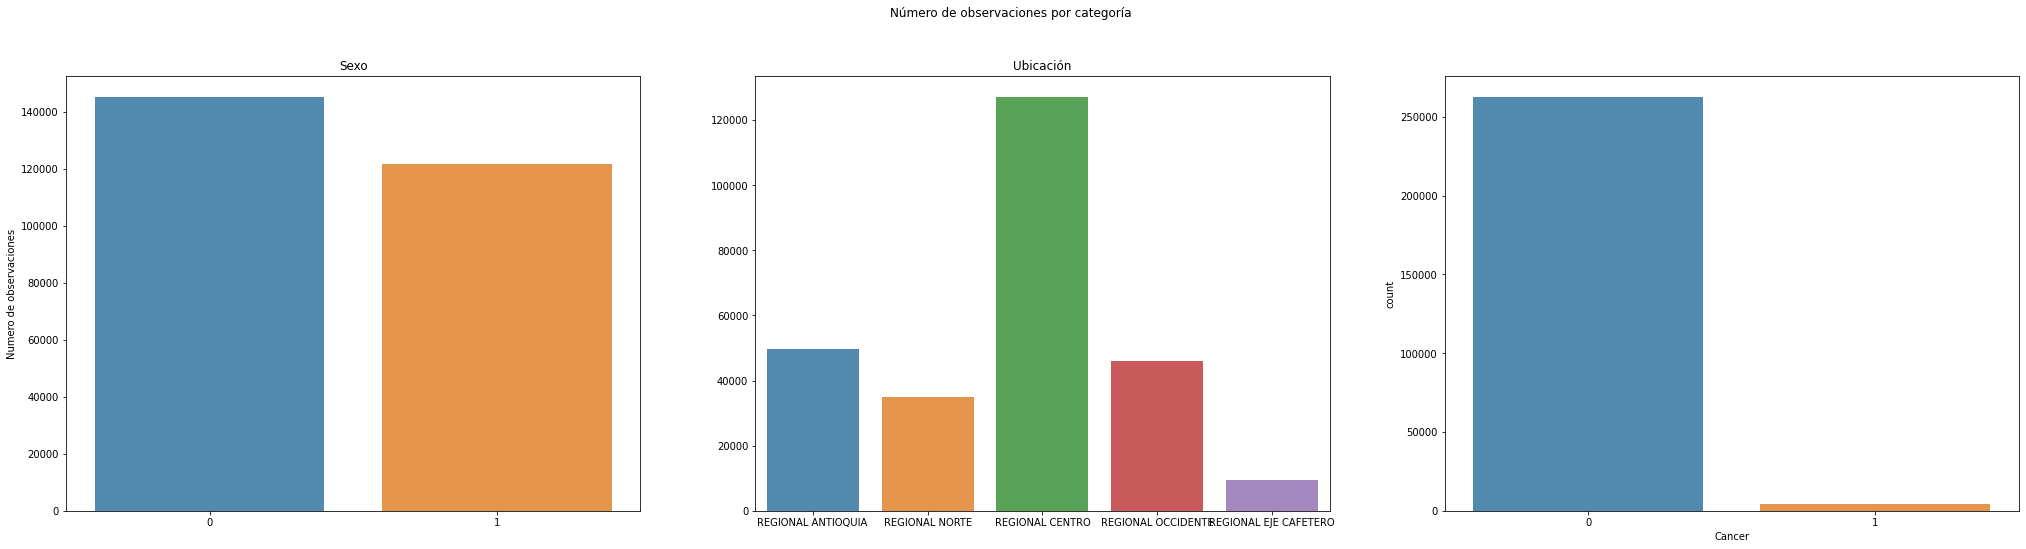

In [ ]:
fig, axs = plt.subplots (ncols=3, figsize=(35,8))
sns.countplot (x='Sexo_cd', data=sociodemograficas, ax=axs[0], alpha=.85)
sns.countplot (x='Regional', data=sociodemograficas, ax=axs[1], alpha=.85)
sns.countplot (x='Cancer', data=sociodemograficas, ax=axs[2], alpha=.85)
axs[0].set (xlabel=None, ylabel='Numero de observaciones', title = "Sexo")
axs[1].set(xlabel=None, ylabel=None, title= 'Ubicación')
fig.suptitle('Número de observaciones por categoría', y=1.00)

Text(0.5, 1.0, 'Número de observaciones por categoría')

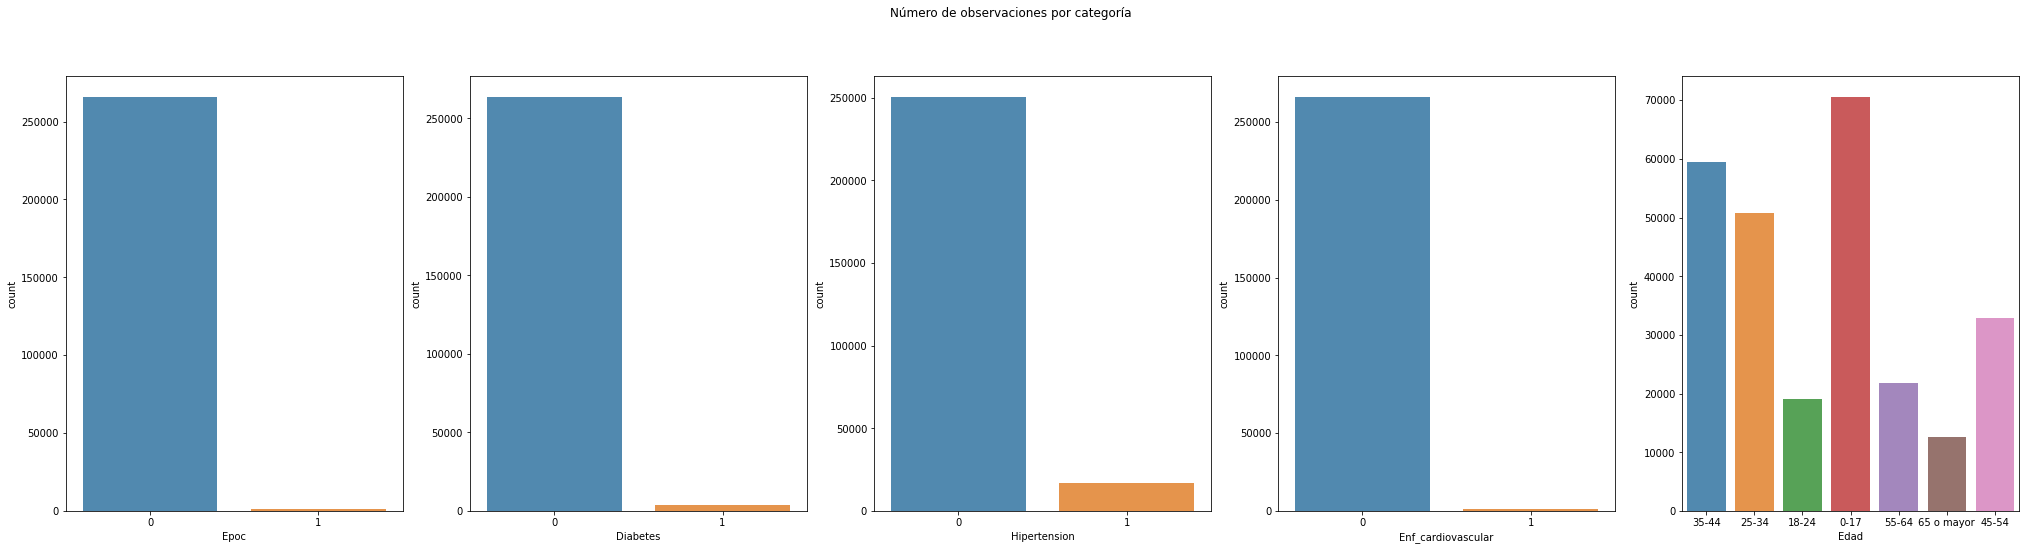

In [ ]:
fig, axs = plt.subplots (ncols=5, figsize=(35,8))
sns.countplot (x='Epoc', data=sociodemograficas, ax=axs[0], alpha=.85)
sns.countplot (x='Diabetes', data=sociodemograficas, ax=axs[1], alpha=.85)
sns.countplot (x='Hipertension', data=sociodemograficas, ax=axs[2], alpha=.85)
sns.countplot (x='Enf_cardiovascular', data=sociodemograficas, ax=axs[3], alpha=.85)
sns.countplot (x='Edad', data=sociodemograficas, ax=axs[4], alpha=.85)
fig.suptitle('Número de observaciones por categoría', y=1.00)

###¿Cuál es la cantidad de asegurados por sexo y edad? 

In [ ]:
df = sociodemograficas.groupby(['Sexo_cd', 'Edad'])['Asegurado_id'].count().reset_index().rename(columns = {'Asegurado_id': 'Counts'})

In [ ]:
fig = px.histogram(df, x= 'Edad', y= 'Counts', color = 'Sexo_cd', barmode = 'group')
fig.update_layout(font = dict(size = 15))
fig.show()

###¿Cuál es la cantidad de asegurados con cancer por sexo y edad? 

In [ ]:
df = sociodemograficas[sociodemograficas['Cancer']== 1]

In [ ]:
df1 = df.groupby(['Sexo_cd', 'Edad'])['Cancer'].count().reset_index()

In [ ]:
fig = px.histogram(df1, x= 'Edad', y= 'Cancer', color = 'Sexo_cd', barmode = 'group', color_discrete_sequence= px.colors.sequential.Cividis)
fig.update_layout(font = dict(size = 15))
fig.show()

###¿Cuál es la cantidad de asegurados con hipertensión por sexo y edad?

In [ ]:
df = sociodemograficas[sociodemograficas['Hipertension']== 1]
df1 = df.groupby(['Sexo_cd', 'Edad'])['Hipertension'].count().reset_index()

In [ ]:
fig = px.histogram(df1, x= 'Edad', y= 'Hipertension', color = 'Sexo_cd', barmode = 'group', color_discrete_sequence= px.colors.sequential.Plasma)
fig.update_layout(font = dict(size = 15))
fig.show()

In [ ]:
sociodemograficas[{'Cancer', 'Epoc', 'Diabetes', 'Hipertension','Enf_cardiovascular'}].sum()

Cancer                 4383
Enf_cardiovascular      925
Hipertension          16746
Diabetes               3538
Epoc                   1256
dtype: int64

## Base de datos Siniestros


In [ ]:
siniestros.describe()

Año_pago      Mes_pago  Asegurado_id       Eventos  Valor_pagado
count  3.308396e+06  3.308396e+06  3.308396e+06  3.308396e+06  3.308396e+06
mean   2.018523e+03  6.691771e+00  2.061818e+07  2.213212e+00  3.714436e+05
std    4.994581e-01  3.405676e+00  1.594802e+07  3.517618e+00  2.530460e+06
min    2.018000e+03  1.000000e+00  7.382840e+05  0.000000e+00  1.000000e+00
25%    2.018000e+03  4.000000e+00  5.756561e+06  1.000000e+00  6.031800e+04
50%    2.019000e+03  7.000000e+00  1.660812e+07  1.000000e+00  1.022140e+05
75%    2.019000e+03  1.000000e+01  3.379259e+07  2.000000e+00  2.257912e+05
max    2.019000e+03  1.200000e+01  5.858458e+07  2.790000e+02  1.671065e+09

In [ ]:
siniestros.head(5)

Fecha_pago  Año_pago  Mes_pago  Asegurado_id              Reclamacion  \
0 2018-03-01      2018         3       4834968  EXAMENES DE DIAGNOSTICO   
1 2019-09-01      2019         9      14915125  EXAMENES DE DIAGNOSTICO   
2 2018-07-01      2018         7      42959949  EXAMENES DE DIAGNOSTICO   
3 2018-03-01      2018         3      30540131         CONSULTA EXTERNA   
4 2019-05-01      2019         5      21442420      LABORATORIO CLINICO   

  Diagnostico_codigo                  Diagnostico_desc  Eventos  Valor_pagado  
0               Z011  EXAMEN DE OÍDOS Y DE LA AUDICIÓN        1        111600  
1                  9             DIAGNÓSTICO PENDIENTE        1         50468  
2                  9             DIAGNÓSTICO PENDIENTE        1        610452  
3                  9             DIAGNÓSTICO PENDIENTE        1         42160  
4                  9             DIAGNÓSTICO PENDIENTE       18        617336

###¿Cuál es el comportamiento de la incidencia de siniestros a través del tiempo? 

In [ ]:
siniestros

Fecha_pago  Año_pago  Mes_pago  Asegurado_id              Reclamacion  \
0       2018-03-01      2018         3       4834968  EXAMENES DE DIAGNOSTICO   
1       2019-09-01      2019         9      14915125  EXAMENES DE DIAGNOSTICO   
2       2018-07-01      2018         7      42959949  EXAMENES DE DIAGNOSTICO   
3       2018-03-01      2018         3      30540131         CONSULTA EXTERNA   
4       2019-05-01      2019         5      21442420      LABORATORIO CLINICO   
...            ...       ...       ...           ...                      ...   
3308475 2019-12-01      2019        12       6197783  EXAMENES DE DIAGNOSTICO   
3308476 2019-05-01      2019         5       1001139         CONSULTA EXTERNA   
3308477 2018-03-01      2018         3      21888100    CONSULTA DE URGENCIAS   
3308478 2018-05-01      2018         5      56483856    CONSULTA DE URGENCIAS   
3308479 2019-02-01      2019         2      10095316         CONSULTA EXTERNA   

        Diagnostico_codigo                  Diagnostico_desc  Eventos  \
0                     Z011  EXAMEN DE OÍDOS Y DE LA AUDICIÓN        1   
1                        9             DIAGNÓSTICO PENDIENTE        1   
2                        9             DIAGNÓSTICO PENDIENTE        1   
3                        9             DIAGNÓSTICO PENDIENTE        1   
4                        9             DIAGNÓSTICO PENDIENTE       18   
...                    ...                               ...      ...   
3308475                  9             DIAGNÓSTICO PENDIENTE        1   
3308476                  9             DIAGNÓSTICO PENDIENTE        4   
3308477                  9             DIAGNÓSTICO PENDIENTE        1   
3308478                  9             DIAGNÓSTICO PENDIENTE        1   
3308479                  9             DIAGNÓSTICO PENDIENTE        1   

         Valor_pagado  
0              111600  
1               50468  
2              610452  
3               42160  
4              617336  
...               ...  
3308475         90105  
3308476        297352  
3308477        350354  
3308478         58280  
3308479        105400  

[3308396 rows x 9 columns]

In [ ]:
siniestros

Fecha_pago  Año_pago  Mes_pago  Asegurado_id              Reclamacion  \
0       2018-03-01      2018         3       4834968  EXAMENES DE DIAGNOSTICO   
1       2019-09-01      2019         9      14915125  EXAMENES DE DIAGNOSTICO   
2       2018-07-01      2018         7      42959949  EXAMENES DE DIAGNOSTICO   
3       2018-03-01      2018         3      30540131         CONSULTA EXTERNA   
4       2019-05-01      2019         5      21442420      LABORATORIO CLINICO   
...            ...       ...       ...           ...                      ...   
3308475 2019-12-01      2019        12       6197783  EXAMENES DE DIAGNOSTICO   
3308476 2019-05-01      2019         5       1001139         CONSULTA EXTERNA   
3308477 2018-03-01      2018         3      21888100    CONSULTA DE URGENCIAS   
3308478 2018-05-01      2018         5      56483856    CONSULTA DE URGENCIAS   
3308479 2019-02-01      2019         2      10095316         CONSULTA EXTERNA   

        Diagnostico_codigo                  Diagnostico_desc  Eventos  \
0                     Z011  EXAMEN DE OÍDOS Y DE LA AUDICIÓN        1   
1                        9             DIAGNÓSTICO PENDIENTE        1   
2                        9             DIAGNÓSTICO PENDIENTE        1   
3                        9             DIAGNÓSTICO PENDIENTE        1   
4                        9             DIAGNÓSTICO PENDIENTE       18   
...                    ...                               ...      ...   
3308475                  9             DIAGNÓSTICO PENDIENTE        1   
3308476                  9             DIAGNÓSTICO PENDIENTE        4   
3308477                  9             DIAGNÓSTICO PENDIENTE        1   
3308478                  9             DIAGNÓSTICO PENDIENTE        1   
3308479                  9             DIAGNÓSTICO PENDIENTE        1   

         Valor_pagado  
0              111600  
1               50468  
2              610452  
3               42160  
4              617336  
...               ...  
3308475         90105  
3308476        297352  
3308477        350354  
3308478         58280  
3308479        105400  

[3308396 rows x 9 columns]

In [ ]:
base1 =siniestros.resample('1M', on='Fecha_pago').sum().reset_index()
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=base1.Fecha_pago,
    y=base1.Eventos,
    name = 'Comportamiento de incidencia de siniestros a través del tiempo'
))
fig.update_layout(title_text='Comportamiento de incidencia de siniestros a través del tiempo', title_x=0.5, width=1200)
fig.show()

###¿Cuál es el comportamiento del valor pagado por los siniestros a través del tiempo?

In [ ]:
base1 =siniestros.resample('1M', on='Fecha_pago').sum().reset_index()
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=base1.Fecha_pago,
    y=base1.Valor_pagado,
    name = 'Comportamiento del valor pagado por los siniestros a través del tiempo'
))
fig.update_layout(title_text='Comportamiento del valor pagado por los siniestros a través del tiempo', title_x=0.5, width=1200)
fig.show()

###Top 10 de las reclamaciones más frecuentes

In [ ]:
base = siniestros.groupby(['Reclamacion'])[['Eventos']].count().sort_values('Eventos', ascending = False).reset_index().rename(columns = {'Eventos': 'total reclamaciones'}).head(10)

In [ ]:
fig = px.bar(base, x = 'Reclamacion', y='total reclamaciones', color="Reclamacion",
             title= '<b>Top 10 de las reclamaciones más frecuentes<b>',
             color_discrete_sequence= ['#003A79', '#084587', '#145397', '#115093', '#296AAF', '#3E7FC4', '#4D8CCE', '#6EA8E4', '#8ABEF5', '#C2DFFF'])
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)')
fig.show()

###¿Cuál es el comportamiento del valor pagado a los reclamadores del seguro? 

In [ ]:
base = siniestros.groupby(['Asegurado_id'])['Valor_pagado'].sum().reset_index()

In [ ]:
base = base[base['Valor_pagado'] < 1000000000]

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=base.Asegurado_id,
    y=base.Valor_pagado,
    name = 'Comportamiento del valor pagado a los reclamadores del seguro'
))
fig.update_layout(title_text='Comportamiento del valor pagado a los reclamadores del seguro', title_x=0.5, width=1200)
fig.show()



###Top 5 de los diagnósticos más frecuentes de los reclamadores

In [ ]:
cie1= cie.copy(deep = True)

In [ ]:
cie1['letra'] = cie1['letra'].replace('numeric', 'diagnóstico pendiente')
cie1['letra'] = cie1['letra'].replace('Z', 'Factores que influyen en el estado de salud y contacto con los servicios de salud')
cie1['letra'] = cie1['letra'].replace('R', 'Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte')
cie1['letra'] = cie1['letra'].replace('E', 'Enfermedades endocrinas, nutricionales y metabólicas')
cie1['letra'] = cie1['letra'].replace('K', 'Enfermedades del aparato digestivo')

In [ ]:
cie1['letra'] = cie1['letra'].replace('W', 'Otras causas externas de traumatismos accidentales')
cie1['letra'] = cie1['letra'].replace('Y', 'agresión')
cie1['letra'] = cie1['letra'].replace('X', 'Exposición al fuego humo y llamas')
cie1['letra'] = cie1['letra'].replace('V', 'Causas externas de morbilidad y de mortalidad')
cie1['letra'] = cie1['letra'].replace('U', 'Códigos para situaciones especiales')

In [ ]:
cie2 = cie1.head(5)

In [ ]:
fig = px.bar(cie2, x = 'cantidad', y='letra', color="letra",
             title= '<b>Top 5 de los diagnósticos más frecuentes de los reclamadores<b>',
             color_discrete_sequence= ['#003A79', '#084587', '#145397', '#115093', '#296AAF', '#3E7FC4', '#4D8CCE', '#6EA8E4', '#8ABEF5', '#C2DFFF'])
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)')
fig.show()

###Top 5 de los diagnósticos menos frecuentes de los reclamadores

In [ ]:
cie3 = cie1.tail(5)

In [ ]:
fig = px.bar(cie3, x = 'cantidad', y='letra', color="letra",
             title= '<b>Top 5 de los diagnósticos menos frecuentes de los reclamadores<b>',
             color_discrete_sequence= ['#003A79', '#084587', '#145397', '#115093', '#296AAF', '#3E7FC4', '#4D8CCE', '#6EA8E4', '#8ABEF5', '#C2DFFF'])
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [ ]:
siniestros.head(1)

Fecha_pago  Año_pago  Mes_pago  Asegurado_id              Reclamacion  \
0 2018-03-01      2018         3       4834968  EXAMENES DE DIAGNOSTICO   

  Diagnostico_codigo                  Diagnostico_desc  Eventos  Valor_pagado  
0               Z011  EXAMEN DE OÍDOS Y DE LA AUDICIÓN        1        111600


###¿Cuáles son las 10 reclamaciones más costosas en promedio?

In [ ]:
base =siniestros.groupby(['Reclamacion']) [['Valor_pagado']].sum().reset_index().sort_values('Valor_pagado', ascending= False)
#df_GRA['%'] = round(df_GRA['TotalPeople']/df_GRA['TotalPeople'].sum()*100, 2)
#df_GRA.drop('TotalPeople', axis=1)

In [ ]:
base

Reclamacion  Valor_pagado
13                            EXAMENES DE DIAGNOSTICO  224375576925
4                  CIRUGIA AMBULATORIA POR ENFERMEDAD  190630896676
36  TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERM...  188530128948
18                                LABORATORIO CLINICO  127279912188
9                                    CONSULTA EXTERNA  126535166353
31     TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD  107996513868
23                 TRATAMIENTO AMBULATORIO POR CANCER   61070444146
8                               CONSULTA DE URGENCIAS   57294766061
1                                  ATENCION DEL PARTO   31547400856
20                                               PAMD   18657806572
35  TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER...   17468793511
15                             FISIOTERAPIA ILIMITADA   16315255838
34  TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE   11557130758
39                           TRATAMIENTOS ESPECIFICOS    8629838157
26      TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES    8205564807
3                   CIRUGIA AMBULATORIA POR ACCIDENTE    7568833874
29  TRATAMIENTO MEDICO HOSPITALARIO POR CANCER Y C...    6368673584
10                               CONSULTAS PRENATALES    3768929080
38               TRATAMIENTOS AMBULATORIOS ESPECIALES    2743395053
17                                     INFILTRACIONES    2498170510
7                                        CONCILIACION    2451614216
33        TRATAMIENTO MEDICO HOSPITALARIO SIQUIATRICO    1354980315
30  TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACI...    1199464967
22                             TRASLADO EN AMBULANCIA     797051292
21                                    Sin Informacion     715986211
25           TRATAMIENTO HOSPITALARIO POR TRASPLANTES     671022228
37  TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERM...     577565054
6                       COBERTURA PROGRAMA PALIATIVOS     507700832
11                                           DIALISIS     417468477
27  TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD ...     377085347
28      TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE     274414242
16                                         FUNERARIOS     164085814
2                   ATENCION INTEGRAL DE SALUD MENTAL     124220367
19                                        ODONTOLOGÍA      54064027
14                      EXONERACION DE PAGO DE PRIMAS      49193001
32  TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD...      33526542
0                                      ANEXO EXEQUIAL      31819295
40                                         VACUNACION      21149316
5        CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA      15602672
12                                DONACION DE ORGANOS        620000
24       TRATAMIENTO HOSPITALARIO POR ESTADO COMATOSO        559599

In [ ]:
base1 =siniestros.groupby(['Reclamacion']) [['Valor_pagado']].count().reset_index().sort_values('Valor_pagado', ascending= False).rename(columns={'Valor_pagado': 'TotalPersonas'})

In [ ]:
base1

Reclamacion  TotalPersonas
9                                    CONSULTA EXTERNA        1255723
13                            EXAMENES DE DIAGNOSTICO         694234
18                                LABORATORIO CLINICO         520211
8                               CONSULTA DE URGENCIAS         365872
4                  CIRUGIA AMBULATORIA POR ENFERMEDAD         106392
15                             FISIOTERAPIA ILIMITADA          98370
39                           TRATAMIENTOS ESPECIFICOS          49707
26      TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES          39360
10                               CONSULTAS PRENATALES          33685
31     TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD          28504
36  TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERM...          20484
3                   CIRUGIA AMBULATORIA POR ACCIDENTE          17594
23                 TRATAMIENTO AMBULATORIO POR CANCER          14949
17                                     INFILTRACIONES          11584
20                                               PAMD          11463
1                                  ATENCION DEL PARTO          10344
21                                    Sin Informacion           8947
22                             TRASLADO EN AMBULANCIA           7646
7                                        CONCILIACION           4391
38               TRATAMIENTOS AMBULATORIOS ESPECIALES           3258
34  TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE           1436
35  TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER...            867
27  TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD ...            813
29  TRATAMIENTO MEDICO HOSPITALARIO POR CANCER Y C...            536
19                                        ODONTOLOGÍA            470
30  TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACI...            467
6                       COBERTURA PROGRAMA PALIATIVOS            380
40                                         VACUNACION            153
11                                           DIALISIS            126
2                   ATENCION INTEGRAL DE SALUD MENTAL            118
33        TRATAMIENTO MEDICO HOSPITALARIO SIQUIATRICO            104
28      TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE             97
16                                         FUNERARIOS             35
37  TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERM...             31
0                                      ANEXO EXEQUIAL             10
25           TRATAMIENTO HOSPITALARIO POR TRASPLANTES              9
14                      EXONERACION DE PAGO DE PRIMAS              9
5        CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA              8
32  TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD...              7
24       TRATAMIENTO HOSPITALARIO POR ESTADO COMATOSO              1
12                                DONACION DE ORGANOS              1

In [ ]:
df = pd.merge(base, base1, how = 'outer', on = 'Reclamacion')

In [ ]:
df

Reclamacion  Valor_pagado  \
0                             EXAMENES DE DIAGNOSTICO  224375576925   
1                  CIRUGIA AMBULATORIA POR ENFERMEDAD  190630896676   
2   TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERM...  188530128948   
3                                 LABORATORIO CLINICO  127279912188   
4                                    CONSULTA EXTERNA  126535166353   
5      TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD  107996513868   
6                  TRATAMIENTO AMBULATORIO POR CANCER   61070444146   
7                               CONSULTA DE URGENCIAS   57294766061   
8                                  ATENCION DEL PARTO   31547400856   
9                                                PAMD   18657806572   
10  TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER...   17468793511   
11                             FISIOTERAPIA ILIMITADA   16315255838   
12  TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE   11557130758   
13                           TRATAMIENTOS ESPECIFICOS    8629838157   
14      TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES    8205564807   
15                  CIRUGIA AMBULATORIA POR ACCIDENTE    7568833874   
16  TRATAMIENTO MEDICO HOSPITALARIO POR CANCER Y C...    6368673584   
17                               CONSULTAS PRENATALES    3768929080   
18               TRATAMIENTOS AMBULATORIOS ESPECIALES    2743395053   
19                                     INFILTRACIONES    2498170510   
20                                       CONCILIACION    2451614216   
21        TRATAMIENTO MEDICO HOSPITALARIO SIQUIATRICO    1354980315   
22  TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACI...    1199464967   
23                             TRASLADO EN AMBULANCIA     797051292   
24                                    Sin Informacion     715986211   
25           TRATAMIENTO HOSPITALARIO POR TRASPLANTES     671022228   
26  TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERM...     577565054   
27                      COBERTURA PROGRAMA PALIATIVOS     507700832   
28                                           DIALISIS     417468477   
29  TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD ...     377085347   
30      TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE     274414242   
31                                         FUNERARIOS     164085814   
32                  ATENCION INTEGRAL DE SALUD MENTAL     124220367   
33                                        ODONTOLOGÍA      54064027   
34                      EXONERACION DE PAGO DE PRIMAS      49193001   
35  TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD...      33526542   
36                                     ANEXO EXEQUIAL      31819295   
37                                         VACUNACION      21149316   
38       CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA      15602672   
39                                DONACION DE ORGANOS        620000   
40       TRATAMIENTO HOSPITALARIO POR ESTADO COMATOSO        559599   

    TotalPersonas  
0          694234  
1          106392  
2           20484  
3          520211  
4         1255723  
5           28504  
6           14949  
7          365872  
8           10344  
9           11463  
10            867  
11          98370  
12           1436  
13          49707  
14          39360  
15          17594  
16            536  
17          33685  
18           3258  
19          11584  
20           4391  
21            104  
22            467  
23           7646  
24           8947  
25              9  
26             31  
27            380  
28            126  
29            813  
30             97  
31             35  
32            118  
33            470  
34              9  
35              7  
36             10  
37            153  
38              8  
39              1  
40              1

In [ ]:
df['prom'] = round(df['Valor_pagado']/df['TotalPersonas'])

In [ ]:
df.sort_values('prom', inplace=True, ascending = False)
df.head()

Reclamacion  Valor_pagado  \
25           TRATAMIENTO HOSPITALARIO POR TRASPLANTES     671022228   
10  TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER...   17468793511   
26  TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERM...     577565054   
21        TRATAMIENTO MEDICO HOSPITALARIO SIQUIATRICO    1354980315   
16  TRATAMIENTO MEDICO HOSPITALARIO POR CANCER Y C...    6368673584   

    TotalPersonas        prom  
25              9  74558025.0  
10            867  20148551.0  
26             31  18631131.0  
21            104  13028657.0  
16            536  11881854.0

In [ ]:
df2 = df.head(10)

In [ ]:
fig = px.bar(df2, x = 'Reclamacion', y='prom',
             title= '<b>¿Cuáles son las 10 reclamaciones más costosas en promedio?<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width = 1300)

fig.update_layout(
    xaxis_title = 'Reclamacion',
    yaxis_title = 'Prom',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

###¿Cuáles son las 10 reclamaciones menos costosas en promedio?

In [ ]:
df.sort_values('prom', inplace=True, ascending = False)


In [ ]:
df3 = df.tail(11)

In [ ]:
df3_sininf=df3[df3["Reclamacion"] == 'Sin Informacion'].index
df3_sininf=df3.drop(df3_sininf)

In [ ]:
fig = px.bar(df3_sininf, x = 'Reclamacion', y='prom',
             title= '<b>¿Cuáles son las 10 reclamaciones menos costosas en promedio?<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width = 1300)

fig.update_layout(
    xaxis_title = 'Reclamacion',
    yaxis_title = 'Prom',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

## Base expuestos

###¿Cúal es el comportamiento de la exposición en las personas?

In [ ]:
expuestos1 = expuestos.copy(deep = True)
expuestos1['Expo'] = expuestos1['Expo'].apply(lambda x: "0%-20%" if ((x >= 0) & (x <= 0.20)) else "21%-40%" if ((x >= 0.21) & (x <= 0.40)) else "41%-60%" if ((x >= 0.41) & (x <= 0.60)) else  "61%-80%" if ((x >= 0.61) & (x <= 0.80)) else  "81%-100%" )
base = expuestos1.groupby(['Expo'])['Asegurado_id'].count().reset_index().rename(columns={'Asegurado_id': 'Porcentaje de exposición'})
fig = px.pie(base, values = 'Porcentaje de exposición', names ='Expo',
             title= '<b> comportamiento de la exposición en las personas<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width=500)

fig.update_layout( 
    template = 'simple_white',
    title_x = 0.5, margin = dict(l= 20, r=20, b=20, t=100))

fig.show()

## Unión de bases

###¿Cuál es el valor pagado total según la enfermedad?

In [ ]:
cs=bodega.copy()
base2 = cs.groupby(['Cancer'])[['Valor_pagado']].sum()
base3 = cs.groupby(['Epoc'])[['Valor_pagado']].sum()
base4 = cs.groupby(['Diabetes'])[['Valor_pagado']].sum()
base5 = cs.groupby(['Hipertension'])[['Valor_pagado']].sum()
base6 = cs.groupby(['Enf_cardiovascular'])[['Valor_pagado']].sum()
base6

baseenf1= pd.merge(base2, base3, how = 'outer', on='Valor_pagado')
baseenf2= pd.merge(baseenf1, base4, how = 'outer', on='Valor_pagado')
baseenf3= pd.merge(baseenf2, base5, how = 'outer', on='Valor_pagado')
baseenf4= pd.merge(baseenf3, base6, how = 'outer', on='Valor_pagado')
baseenf4

Valor_pagado
0  1070040627150
1   155823219079
2  1195884579430
3    29979266799
4  1167514050604
5    58349795625
6  1026709095946
7   199154750283
8  1200110331793
9    25753514436

In [ ]:
df1 = baseenf4.transpose()
df = pd.DataFrame(df1).rename(columns = {0: 'Cancer_0',1: 'Cancer_1',2: 'Epoc_0',3: 'Epoc_1',4: 'Diabetes_0',5: 'Diabetes_1',6: 'Hipertension_0',7: 'Hipertension_1',8: 'Enf_cardiovascular_0',9: 'Enf_cardiovascular_1'})
df

Cancer_0      Cancer_1         Epoc_0       Epoc_1  \
Valor_pagado  1070040627150  155823219079  1195884579430  29979266799   

                 Diabetes_0   Diabetes_1  Hipertension_0  Hipertension_1  \
Valor_pagado  1167514050604  58349795625   1026709095946    199154750283   

              Enf_cardiovascular_0  Enf_cardiovascular_1  
Valor_pagado         1200110331793           25753514436

In [ ]:
enfermedades = ['Epoc', 'Diabetes', 'Hipertension', 'Enf_cardiovascular']
base1 = df[['Cancer_1']].transpose()
base2 = df[['Cancer_0']].transpose()
for i in enfermedades:
    base1 = pd.concat([base1, df[[i+'_1']].transpose()])

for i in enfermedades:
    base2 = pd.concat([base2, df[[i+'_0']].transpose()])

base1 = base1.reset_index().drop('index', axis = 1)
base1 = base1.rename(columns = {'Valor_pagado': 'VP si tiene'})
base2 = base2.reset_index().drop('index', axis = 1)
base2 = base2.rename(columns = {'Valor_pagado': 'VP no tiene'})

In [ ]:
base2

VP no tiene
0  1070040627150
1  1195884579430
2  1167514050604
3  1026709095946
4  1200110331793

In [ ]:
enfermedades = ['Cancer','Epoc', 'Diabetes', 'Hipertension', 'Enf_cardiovascular']
base = pd.DataFrame()
base['Enfermedad'] = enfermedades
base = pd.concat([base, base1, base2], axis = 1)

In [ ]:
base

Enfermedad   VP si tiene    VP no tiene
0              Cancer  155823219079  1070040627150
1                Epoc   29979266799  1195884579430
2            Diabetes   58349795625  1167514050604
3        Hipertension  199154750283  1026709095946
4  Enf_cardiovascular   25753514436  1200110331793

In [ ]:
#Gráfica
si_tiene = base['VP si tiene']
no_tiene = base['VP no tiene']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=base.Enfermedad,
    y=si_tiene,
    name='Valor pagado si tiene',
    marker_color='#3262A7'
))
fig.add_trace(go.Bar(
    x=base.Enfermedad,
    y=no_tiene,
    name='Valor pagado no tiene',
    marker_color='#2CA2FF'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, height = 500)
fig.show()

In [ ]:
cs['Sexo_cd'] = cs['Sexo_cd'].apply(lambda x: "F" if x == 0 else "M" )

###¿Cuál es la región con mayor cantidad de seguros por sexo?

In [ ]:
base = cs.groupby(['Regional', 'Sexo_cd'])[['Asegurado_id']].count().sort_values('Asegurado_id', ascending = False).rename(columns = {'Asegurado_id': 'Total'}).reset_index()
fig = px.sunburst(base, path=[ 'Regional','Sexo_cd'], values='Total', title= '<b> Cantidad de seguros por región y sexo <b>')
fig.show()

###¿Cuál es el valor total pagado por región?

In [ ]:
base = cs.groupby(['Regional'])[['Valor_pagado']].count().sort_values('Valor_pagado', ascending = False).rename(columns = {'Valor_pagado': 'Valor total pagado'}).reset_index()
fig = px.sunburst(base, path=[ 'Regional'], values='Valor total pagado', title= '<b> Valor total pagado por región  <b>')
fig.show()

###¿Cuál es el rango de edad que mayor valor de seguro ha pagado?


In [ ]:
base = bodega.groupby(['Edad'])[['Valor_pagado']].sum().sort_values('Valor_pagado', ascending = False).rename(columns = {'Valor_pagado': 'Total'}).reset_index()
base
fig = px.bar(base, x = 'Edad', y='Total', color="Edad",
             title= '<b> Valor pagado por rango de edad <b>',
             color_discrete_sequence= ['#003A79', '#084587', '#145397', '#115093', '#296AAF', '#3E7FC4', '#4D8CCE', '#6EA8E4', '#8ABEF5', '#C2DFFF'])
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)')
fig.show()

###¿Cuál es el rango de exposición por el valor pagado?

In [ ]:
cs['Expo'] = cs['Expo'].apply(lambda x: "0%-20%" if ((x >= 0) & (x <= 0.20)) else "21%-40%" if ((x >= 0.21) & (x <= 0.40)) else "41%-60%" if ((x >= 0.41) & (x <= 0.60)) else  "61%-80%" if ((x >= 0.61) & (x <= 0.80)) else  "81%-100%" )
base1=cs.groupby(['Expo'])['Valor_pagado'].sum().reset_index()
fig = px.pie(base1, values = 'Valor_pagado', names ='Expo',
             title= '<b> Porcentaje de valor pagado por exposición de las personas <b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width=600)

fig.update_layout( 
    template = 'simple_white',
    title_x = 0.5, margin = dict(l= 20, r=20, b=20, t=100))

fig.show()

###Histograma Exposición

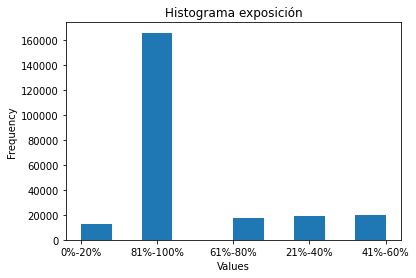

In [ ]:
n, bins, patches=plt.hist(cs['Expo'])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histograma exposición")
plt.show()

# **Selección de variables y contrucción de algoritmos**

In [ ]:
X

Atencion del parto  Cirugia ambulatoria por accidente  \
0                      0.0                                0.0   
1                      0.0                                0.0   
2                      0.0                                0.0   
3                      0.0                                0.0   
4                      0.0                                0.0   
...                    ...                                ...   
234872                 0.6                                0.0   
234873                 0.0                                0.0   
234874                 0.0                                0.0   
234875                 0.0                                0.0   
234876                 0.0                                0.0   

        Cirugia ambulatoria por enfermedad  Cobertura programa paliativos  \
0                                      0.0                            0.0   
1                                      0.0                            0.0   
2                                      0.0                            0.0   
3                                      0.0                            0.0   
4                                      0.0                            0.0   
...                                    ...                            ...   
234872                                 0.0                            0.0   
234873                                 0.0                            0.0   
234874                                 0.0                            0.0   
234875                                 0.0                            0.0   
234876                                 0.0                            0.0   

        Conciliacion  Consulta de urgencias  Consulta externa  \
0           0.000000               0.000000          0.002571   
1           0.000000               0.052174          0.010283   
2           0.000000               0.008696          0.010283   
3           0.000000               0.043478          0.015424   
4           0.333333               0.000000          0.005141   
...              ...                    ...               ...   
234872      0.000000               0.026087          0.033419   
234873      0.000000               0.000000          0.005141   
234874      0.000000               0.000000          0.000000   
234875      0.000000               0.008696          0.007712   
234876      0.000000               0.095652          0.007712   

        Consultas prenatales  Examenes de diagnostico  Fisioterapia ilimitada  \
0                   0.000000                 0.006579                0.001043   
1                   0.000000                 0.000000                0.000000   
2                   0.000000                 0.019737                0.000000   
3                   0.000000                 0.052632                0.000000   
4                   0.000000                 0.138158                0.000000   
...                      ...                      ...                     ...   
234872              0.333333                 0.072368                0.000000   
234873              0.000000                 0.000000                0.000000   
234874              0.000000                 0.006579                0.000000   
234875              0.000000                 0.006579                0.000000   
234876              0.000000                 0.013158                0.000000   

        ...  Diabetes  Hipertension  Enf_cardiovascular      Expo  Edad  \
0       ...       0.0           0.0                 0.0  0.030303     5   
1       ...       0.0           0.0                 0.0  1.000000     4   
2       ...       0.0           0.0                 0.0  1.000000     6   
3       ...       0.0           0.0                 0.0  1.000000     5   
4       ...       1.0           1.0                 0.0  1.000000     7   
...     ...       ...           ...                 ...       ...   ...   
234872  ...       0.0  

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
m_lreg = linear_model.LinearRegression()
m_rtree=tree.DecisionTreeRegressor()
m_rf= RandomForestRegressor()
m_gbt=GradientBoostingRegressor()

modelos=list([m_lreg,m_rtree, m_rf, m_gbt])

In [ ]:
modelo = m_gbt
modelo.fit(X,y)
print(modelo.feature_importances_)


[0.   0.   0.03 0.   0.   0.01 0.02 0.   0.04 0.01 0.01 0.02 0.   0.01
 0.09 0.07 0.28 0.   0.   0.05 0.08 0.   0.05 0.16 0.   0.01 0.01 0.
 0.   0.   0.   0.   0.04 0.   0.   0.   0.   0.   0.  ]


17 'Tratamiento ambulatorio por cancer'

24  'Tratamiento quirurgico hospitalario por cancer y complicaciones'

21 'Tratamiento medico hospitalario por enfermedad'

16 'Traslado en ambulancia'

20 'Tratamiento medico hospitalario por cancer y complicaciones'

23 'Tratamiento quirurgico hospitalario por accidente'

33 edad


In [ ]:
X1=X[['Tratamiento ambulatorio por cancer', 'Tratamiento quirurgico hospitalario por cancer y complicaciones','Tratamiento medico hospitalario por enfermedad', 'Traslado en ambulancia','Tratamiento medico hospitalario por cancer y complicaciones','Tratamiento quirurgico hospitalario por accidente', 'Edad']]

In [ ]:

def medir_modelos(modelos,scoring,X,y,cv,cross_val_score,pd):

    metric_modelos=pd.DataFrame()
    for modelo in modelos:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)
    
    metric_modelos.columns=["reg_lineal","decision_tree","random_forest","gradient_boosting"]
    return metric_modelos


In [ ]:
#construcción de dataFrame con medidadas de desempeño de difererentes modelos, para cada uno de los grupos de variables
score_1 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X,y, kfold, cross_val_score,pd)
score_2 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X1,y, kfold, cross_val_score,pd)

In [ ]:
score_1['Type'] = 'All' #desempeño con todas las variables
score_2['Type'] = '7_v' #desempeño de 7 variables

In [ ]:
scoreF = pd.concat([score_1, score_2], axis = 0) #union de todos los desempeños por modelos

In [ ]:
#BoxPlots de todos los modelos por grupo de variables
fig = go.Figure()
for column in scoreF.columns[:-1]:
    fig.add_trace(go.Box(
        y = scoreF[column],
        x = scoreF.iloc[:,-1],
        name = column
    ))
fig.update_layout(
    yaxis_title = 'score',
    boxmode = 'group',
    colorway = px.colors.sequential.ice
)

fig.show()

In [ ]:
#Selección de variables por kBest, se muestran las 15 más relevantes
kBest = SelectKBest(score_func = f_classif, k =15)
fit = kBest.fit(X,y)
var_names = fit.get_feature_names_out()
var_names


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in true_divide



array(['Atencion del parto', 'Cobertura programa paliativos',
       'Consultas prenatales', 'Examenes de diagnostico',
       'Fisioterapia ilimitada', 'Pamd', 'Traslado en ambulancia',
       'Tratamiento ambulatorio por cancer',
       'Tratamiento medico hospitalario por cancer y complicaciones',
       'Tratamiento medico hospitalario por enfermedad',
       'Tratamiento quirurgico hospitalario por accidente',
       'Tratamiento quirurgico hospitalario por cancer y complicaciones',
       'Tratamiento quirurgico hospitalario por enfermedad',
       'Tratamientos ambulatorios especiales', 'Tratamientos especificos'],
      dtype=object)

In [ ]:
X2=X[['Atencion del parto', 'Cobertura programa paliativos',
       'Consultas prenatales', 'Examenes de diagnostico',
       'Fisioterapia ilimitada', 'Pamd', 'Traslado en ambulancia',
       'Tratamiento ambulatorio por cancer',
       'Tratamiento medico hospitalario por cancer y complicaciones',
       'Tratamiento medico hospitalario por enfermedad',
       'Tratamiento quirurgico hospitalario por accidente',
       'Tratamiento quirurgico hospitalario por cancer y complicaciones',
       'Tratamiento quirurgico hospitalario por enfermedad',
       'Tratamientos ambulatorios especiales', 'Tratamientos especificos']]

In [ ]:
X3= X[['Cancer','Epoc',	'Diabetes',	'Hipertension',	'Enf_cardiovascular','Expo',	'Edad', 'Sexo_cd']]

In [ ]:
#construcción de dataFrame con medidadas de desempeño de difererentes modelos, para cada uno de los grupos de variables
score_3 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X2,y, kfold, cross_val_score,pd)
score_4 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X3,y, kfold, cross_val_score,pd)

In [ ]:
score_3['Type'] = '15_v' #desempeño con todas las variables
score_4['Type'] = '8_v' #desempeño de 7 variables

In [ ]:
scoreF = pd.concat([score_1, score_2,score_3, score_4], axis = 0) #union de todos los desempeños por modelos

In [ ]:
#BoxPlots de todos los modelos por grupo de variables
fig = go.Figure()
for column in scoreF.columns[:-1]:
    fig.add_trace(go.Box(
        y = scoreF[column],
        x = scoreF.iloc[:,-1],
        name = column
    ))
fig.update_layout(
    yaxis_title = 'score',
    boxmode = 'group',
    colorway = px.colors.sequential.ice
)

fig.show()

In [ ]:
X4= X[['Cancer','Epoc',	'Diabetes',	'Hipertension',	'Enf_cardiovascular','Edad','Sexo_cd', 'Tratamiento ambulatorio por cancer', 'Tratamiento quirurgico hospitalario por enfermedad',  'Traslado en ambulancia', 'Examenes de diagnostico','Tratamiento quirurgico hospitalario por cancer y complicaciones','Tratamiento medico hospitalario por cancer y complicaciones','Tratamiento medico hospitalario por enfermedad']]

In [ ]:
score_5 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X4,y, kfold, cross_val_score,pd)

In [ ]:
score_5['Type'] = '14_v' #desempeño de 9 variables

In [ ]:
scoreF = pd.concat([score_1, score_2,score_4, score_5, score_3], axis = 0) #union de todos los desempeños por modelos

In [ ]:
#BoxPlots de todos los modelos por grupo de variables
fig = go.Figure()
for column in scoreF.columns[:-1]:
    fig.add_trace(go.Box(
        y = scoreF[column],
        x = scoreF.iloc[:,-1],
        name = column
    ))
fig.update_layout(
    yaxis_title = 'score',
    boxmode = 'group',
    colorway = px.colors.sequential.ice
)

fig.show()

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

In [ ]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X4, y, test_size=test_size,random_state=seed) #partir datos en entrenamiento y prueba
regr = m_lreg #creación del modelo
regr.fit(X_train, Y_train) # entrenamiento del mdoelo 
predicted = regr.predict(X_test)

In [ ]:
# Grid de hiperparámetros evaluados para regresión lineal
# ------------------------------------------------------------------------------
param_grid = {'n_estimators': [3, 100],
              'max_features': [5,7],
              'max_depth'   : [None, 3]
             }

# Búsqueda por grid search con validación cruzada
# ------------------------------------------------------------------------------
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = Y_train)

# Resultados
# ------------------------------------------------------------------------------
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)


param_max_depth param_max_features param_n_estimators  mean_test_score  \
1            None                  5                100    -1.228000e+07   
3            None                  7                100    -1.233578e+07   
7               3                  7                100    -1.354455e+07   
5               3                  5                100    -1.360314e+07   

   std_test_score  mean_train_score  std_train_score  
1    1.465723e+06     -5.932325e+06    144593.984875  
3    1.416622e+06     -5.930961e+06    150212.255422  
7    1.518186e+06     -1.274842e+07    325959.767297  
5    1.589243e+06     -1.294919e+07    343437.049953

In [ ]:

# Mejores hiperparámetros por validación cruzada para Random Forest 
# --------------------------------------------------------------------
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': None, 'max_features': 5, 'n_estimators': 100} : -12352862.607488196 neg_root_mean_squared_error


In [ ]:
m_lreg= grid.best_estimator_

 
# **Evaluar modelos afinados**

In [ ]:
#####Evaluar métrica de entrenamiento y evaluación para mirar sobre ajuste ####
eval=cross_validate(m_lreg,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)

In [ ]:
train_lreg=pd.DataFrame(eval['train_score'])
test_lreg=pd.DataFrame(eval['test_score'])
train_test_lreg=pd.concat([train_lreg, test_lreg],axis=1)

In [ ]:
train_test_lreg.columns=['train_score','test_score']
train_test_lreg

train_score    test_score
0 -5.280475e+06 -1.799207e+07
1 -5.642910e+06 -1.478798e+07
2 -6.417578e+06 -8.355103e+06
3 -6.429018e+06 -6.955025e+06
4 -6.064954e+06 -1.281265e+07

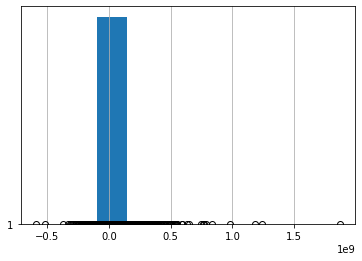

In [ ]:
predictions=cross_val_predict(m_lreg,X2,y,cv=5)

pred=pd.DataFrame(predictions,columns=['pred'])
pdy=y.to_frame()
error=pdy['Valor_pagado']-pred['pred']
error.hist()

plt.boxplot(error,vert=False)
plt.show()

**Importancia de variables**

In [ ]:
importancia = permutation_importance(
                estimator    = m_lreg,
                X            = X_train,
                y            = Y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

importances_mean  importances_std  \
7       1.530974e+06     12410.622482   
12      1.399484e+06     12063.335701   
3       6.239726e+05      3849.101399   
11      5.629413e+05      4671.807545   
6       5.338804e+05      4623.508117   
8       4.291448e+05      1987.218556   
9       3.706900e+05      4316.914866   
5       1.712487e+05      2646.405783   
1       6.645721e+04       885.044959   
4       4.907206e+04      1010.211109   
10      3.700253e+04      1314.133677   
13      2.610008e+04       493.173678   
14      2.084143e+04      1899.681976   
0       1.159483e+04       691.923076   
2       2.999663e+03       267.517766   

                                              feature  
7                  Tratamiento ambulatorio por cancer  
12  Tratamiento quirurgico hospitalario por enferm...  
3                             Examenes de diagnostico  
11  Tratamiento quirurgico hospitalario por cancer...  
6                              Traslado en ambulancia  
8   Tratamiento medico hospitalario por cancer y c...  
9      Tratamiento medico hospitalario por enfermedad  
5                                                Pamd  
1                       Cobertura programa paliativos  
4                              Fisioterapia ilimitada  
10  Tratamiento quirurgico hospitalario por accidente  
13               Tratamientos ambulatorios especiales  
14                           Tratamientos especificos  
0                                  Atencion del parto  
2                                Consultas prenatales

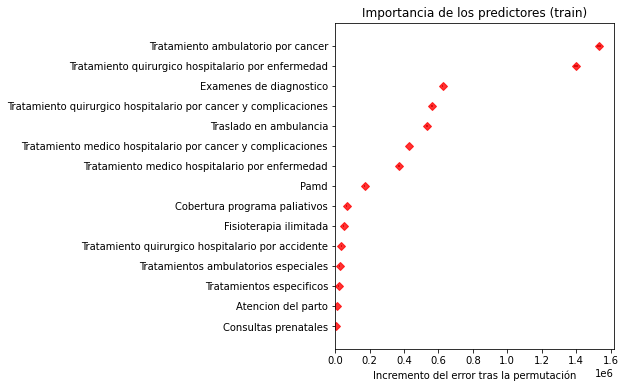

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

#**Despliegue**

In [ ]:
#XF= X[['Cancer','Epoc',	'Diabetes',	'Hipertension',	'Enf_cardiovascular','Edad','Sexo_cd']]

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X4,y)

LinearRegression()

In [ ]:
print("Intercept:", regr.intercept_)
print("coeficiente", list(zip(X4.columns, regr.coef_.flatten(), )))
print("R^2", regr.score(X4,y))

Intercept: 1697638.0750130937
coeficiente [('Cancer', 27897417.518896915), ('Epoc', 11303870.198106898), ('Diabetes', 4867757.080839506), ('Hipertension', 2067104.803595742), ('Enf_cardiovascular', 13831355.695114955), ('Edad', 895355.3651115801), ('Sexo_cd', -705350.0153497101)]
R^2 0.08160952886609107


In [ ]:
XF= XF.astype({'Cancer' : int, 'Epoc' : int, 'Diabetes' : int, 'Hipertension' : int, 'Enf_cardiovascular' : int, 'Sexo_cd' : int})

In [ ]:
cat_var = ['Cancer', 'Epoc', 'Diabetes', 'Hipertension', 'Enf_cardiovascular','Edad', 'Sexo_cd']

In [ ]:
for i in cat_var:
    print(str(i)+': '+str (XF[i].unique()))


Cancer: [0 1]
Epoc: [0 1]
Diabetes: [0 1]
Hipertension: [0 1]
Enf_cardiovascular: [0 1]
Edad: [5 4 6 7 2 1 3]
Sexo_cd: [1 0]


In [ ]:
entrada = (1,1,0,1,1,7,0)
aux1 = np.asarray(entrada)
aux2 = aux1.reshape(1,-1)
prediccion = regr.predict(aux2)

print('El costo del seguro es: ', prediccion[0])

El costo del seguro es:  63064873.84650867


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

